# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

Since we're trying to predict a number, this kind of problem is known as a regression problem.

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks. Tools which can be used for each step of the machine learning modelling process.

We'll work through each step and by the end of the notebook, we'll have a trained machine learning model which predicts the sale price of a bulldozer given different characteristics about it

## 1. Problem Definition¶

How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from Kaggle Bluebook for Builldozer competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are three main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
  
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## Evaluation

The and evaluation metric we'll be using (root mean square log error or RMSLE) between actual and predicted prices.

 **Note:** The goal for most regression evaluation metrics is to  minimize the error. For example, our goal for this project will be to build a machine learning model which minimizes RMSLE.

## 4. Feature

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary : https://www.kaggle.com/competitions/bluebook-for-bulldozers/data?select=Data+Dictionary.xlsx


In [1]:
import numpy as  np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
!pip install xgboost


In [2]:
import zipfile

# Path to the ZIP file
zip_path = "C:/Users/a2z/Downloads/bluebook-for-bulldozers (1).zip"

# Save location on Desktop
csv_save_path = "C:/Users/a2z/Desktop/TrainAndValid.csv"

# Extract and save the CSV
with zipfile.ZipFile(zip_path) as z:
    with z.open("bluebook-for-bulldozers/TrainAndValid.csv") as f:
        with open(csv_save_path, "wb") as out_file:
            out_file.write(f.read())

print(" TrainAndValid.csv has been saved to Desktop!")



 TrainAndValid.csv has been saved to Desktop!


In [3]:
data = pd.read_csv("C:/Users/a2z/Desktop/TrainAndValid.csv", low_memory=False) 
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
data.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
data.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

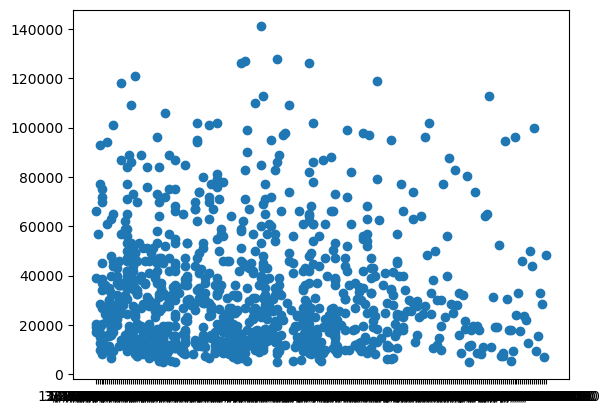

In [7]:
# We want to take an idea how price is fluxuating with datae
fig, ax = plt.subplots()
ax.scatter(data["saledate"][:1000], data["SalePrice"][:1000])  # saledate on x axis and price on y


In [8]:
data.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

In [9]:
data.saledate.dtype

dtype('O')

<Axes: ylabel='Frequency'>

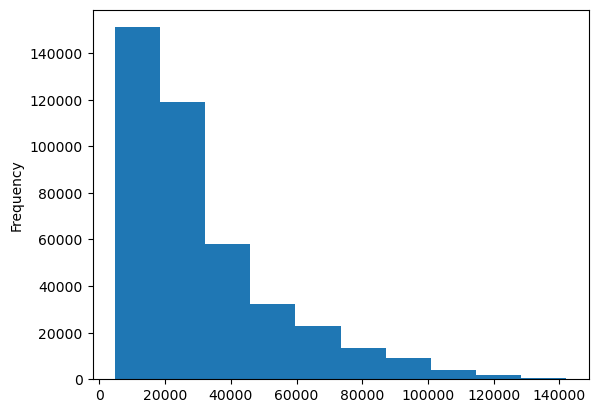

In [10]:
# lets check distribution or spread of data with hist(exproring the dataset)
data.SalePrice.plot.hist()

### Parsing 

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using 'parse dates' parameter.

In Pandas, a DateTime object represents dates and times in a structured format.
It allows you to analyze time-based data — like filtering by month, calculating time differences, or plotting trends over time.


In [11]:
# Import data again but this time parse dates
data = pd.read_csv("C:/Users/a2z/Desktop/TrainAndValid.csv",
                   low_memory=False,
                   parse_dates=["saledate"])


In [12]:
data.saledate.dtype

dtype('<M8[ns]')

In [13]:
data.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

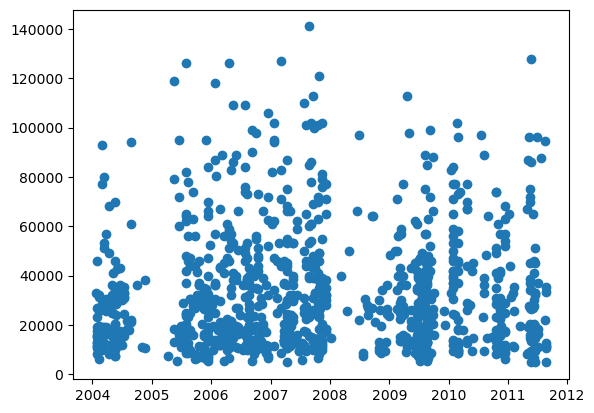

In [14]:
fig, ax = plt.subplots()
ax.scatter(data["saledate"][:1000], data["SalePrice"][:1000])

In [15]:
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [17]:
data.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

# Sort DataFrame by saledate
When working with time series data, it's good idea to sort it by date.

In [18]:
# Sort DataFrame in date order
data.sort_values(by=["saledate"], inplace=True, ascending=True)
data.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [19]:
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


# Make a copy of the original DataFrame
We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data

In [20]:
# Make a copy (Feature engginering)
data_tmp = data.copy()

In [21]:
data_tmp.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

# Add datetime parameters for 'saledate' column

In [22]:
data_tmp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int32

In [23]:
data_tmp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int32

In [24]:
data_tmp[:1].saledate

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [25]:
data_tmp["saleYear"] = data_tmp.saledate.dt.year
data_tmp["saleMonth"] = data_tmp.saledate.dt.month
data_tmp["saleDay"] = data_tmp.saledate.dt.day
data_tmp["saleDayofWeek"] = data_tmp.saledate.dt.dayofweek
data_tmp["saleDayofYear"] = data_tmp.saledate.dt.dayofyear

In [26]:
data_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [27]:
# Now we've (got the information) enrichedour DataFrame with date time features, we can remove 'saledate'
data_tmp.drop("saledate", axis=1, inplace=True)

In [28]:
# Check the values of different columns (EDA)
data_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

In [29]:
data_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayofYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


# 5. Modelling
We've done enough EDA(we could always do more) but let's start to do some model-driven EDA

In [30]:
# Let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,     # it going to use as many cores as possible
                              random_state=42)

model.fit(data_tmp.drop("SalePrice",axis=1), data_tmp["SalePrice"])

ValueError: could not convert string to float: 'Low'

# Convert string to categories
One way we can turn all of our data into numbers is by converting them into pandas categories.

We can check the different datatypes compatible with pandas here:https://pandas.pydata.org/docs/reference/arrays.html

In [ ]:
data_tmp.head()

In [31]:
pd.api.types.is_string_dtype(data_tmp["UsageBand"])

False

In [32]:
# Find the columns which contain strings
for label, content in data_tmp.items(): # it treats the dataframe like a dictionary
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [33]:
# If you're wondering what df.items() does, here's an example
random_dict = {"key1": "hello",
               "key2": "world!"}

for key, value in random_dict.items():
    print(f"this is a key: {key}",
          f"this is a value: {value}")

this is a key: key1 this is a value: hello
this is a key: key2 this is a value: world!


In [34]:
 # This will turn all of the string value into category values
for label, content in data_tmp.items():
    if pd.api.types.is_string_dtype(content):
        data_tmp[label] = content.astype("category").cat.as_ordered()

In [35]:
data_tmp.info() # now the string types are changed into categories

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  object  
 12  fiModelSeries             58667 non-null   object  
 13  fiModelDescriptor         748

In [36]:
data_tmp.state.cat.categories  # These are still strings

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [37]:
data_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

In [38]:
data_tmp.state.cat.codes  #It returns the integer codes (numeric labels) assigned to each category in the state column

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

##### Thanks to pandas Categories we now have a way to access all of our data in the form of numbers.

but we still have a bunch of misiing data...

In [39]:
# Check missing data
data_tmp.isnull().sum()/len(data_tmp)  # it gives us the percentage of missing data

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocesseed data 

In [40]:
# Export current tmp dataframe
data_tmp.to_csv("C:/Users/a2z/Desktop/train_tmp.csv", index=False)


In [41]:
# Import preprocessed data
data_tmp = pd.read_csv("C:/Users/a2z/Desktop/train_tmp.csv",low_memory=False)
data_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Fill missing values


In [42]:
# Fill numerical missing values first
for label, content in data_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)  # These are numerical labels

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [43]:
data_tmp.ModelID


0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [44]:
# Check for which numeric columns have null values
for label, content in data_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [45]:
# Fill numeric rows with the median
for label, content in data_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            data_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median ( Median is more robust while Mean is sensitive to outliers)
            data_tmp[label] = content.fillna(content.median())

In [46]:
len(data_tmp) # so mean of 401125 different values can be very sensitive to outlers
                # no. of rows

412698

In [47]:
# lets see why not mean
hundreds = np.full((1000,), 100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(np.float64(100.0),
 np.float64(999100.8991008991),
 np.float64(100.0),
 np.float64(100.0))

In [48]:
hundreds_billion

array([       100,        100,        100, ...,        100,        100,
       1000000000], shape=(1001,))

In [49]:
# Checkif there's any null numeric values
for label,content in data_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
# Basically it tell us if there is still any numeric values or numeric columns that have null values then print out those column names

In [50]:
# Create missing value indicator column for auctioneerID
data_tmp["auctioneerID_is_missing"] = data_tmp["auctioneerID"].isnull()

# Check to see how many examples were missing
data_tmp.auctioneerID_is_missing.value_counts()


auctioneerID_is_missing
False    412698
Name: count, dtype: int64

In [51]:
#### That means we filled 20136  missing values in the auctioneer ID column with median of original auctioneer Id column, but we still have soome missing values in our dataframe 

In [52]:
data_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

##### Ok so let's find all columns that are't numerical data and that should tell us all of these columns that still have missing values

### Filling and turning categorical variables into numbers

In [53]:
# Check for columns which are't numeric
for label, content in data_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [54]:
pd.Categorical(data_tmp["state"])

['Texas', 'Florida', 'Florida', 'Florida', 'Florida', ..., 'California', 'California', 'California', 'California', 'California']
Length: 412698
Categories (53, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming']

In [55]:
pd.Categorical(data_tmp["state"]).dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=False, categories_dtype=object)

In [56]:
pd.Categorical(data_tmp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], shape=(412698,), dtype=int8)

###### It turned all the states , the variables in the state column into numbers.
So let's turm all the categorical variables into numercal codes

In [57]:
# Turn categorical variables into numbers and filll missing values
for label, content in data_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing values
        data_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        data_tmp[label] = pd.Categorical(content).codes+1

In [58]:
pd.Categorical(data_tmp["UsageBand"]).codes # here is not -1 means not needed to +1 means all is not null
 

array([0, 0, 0, ..., 0, 0, 0], shape=(412698,), dtype=int8)

In [59]:
pd.Categorical(data_tmp["state"]).codes+1

array([44,  9,  9, ...,  5,  5,  5], shape=(412698,), dtype=int8)

In [60]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [61]:
data_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [62]:
data_tmp.isna().sum() 

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

##### So no more missing values in our data frame and our data is all numeric

## Now that all of data is numeric as well as our dataframe has no misssing values,we should be able to build a machine learning model.

In [63]:
data_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [64]:
%%time  

from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
model = RandomForestRegressor(n_jobs=-1, random_state=42)

# Fit the model (X = all columns except SalePrice, y = SalePrice)
model.fit(data_tmp.drop("SalePrice", axis=1), data_tmp["SalePrice"])


CPU times: total: 49min 53s
Wall time: 7min 34s


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [65]:
# Score of the model
model.score(data_tmp.drop("SalePrice", axis=1), data_tmp["SalePrice"])

0.9875521614960867

**Question:** Why doesn't the above metric hold water? (why isn't the metric reliable ?)

## Splitting data into train/validation sets

In [66]:
data_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [67]:
data_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [68]:
# Split data into training and validatoin
data_val = data_tmp[data_tmp.saleYear == 2012]
data_train = data_tmp[data_tmp.saleYear != 2012]

len(data_val), len(data_train)

(11573, 401125)

In [69]:
data_tmp["auctioneerID_is_missing"] = data_tmp["auctioneerID"].isnull()
data_tmp["MachineHoursCurrentMeter_is_missing"] = data_tmp["MachineHoursCurrentMeter"].isnull()


In [70]:
# Split data into X & Y
X_train, y_train = data_train.drop("SalePrice", axis=1), data_train.SalePrice
X_valid, y_valid = data_val.drop("SalePrice", axis=1), data_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Building an evaluation function

In [102]:
# Create evaluation function (the competition uses RMSME)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    """
    If our model is performing better on the validation data set, that'shint
    ing us that our model is overfitting
    """
    scores = {"Training MAE" : mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

## Training our model on a subset ( to tune the hyperparemeters)

In [72]:
## Tis takes far too long ... for experimenting

# %%time
# model = RandomForestRegressor(n_jobs=-1,
#                                random_state=42)

# model.fit(X_train, y_train)

In [73]:
len(X_train)

401125

In [74]:
# Change max_sample value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

model

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [75]:
X_train.shape[0]

401125

###### Eacch small model, each 100 small models ( n_estimators=100) are going to see every single one of these

In [76]:
# Change max_sample value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

model

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
%%time
# Cutting down on the max number of samppes each estimator improves training time
model.fit(X_train, y_train)

CPU times: total: 1min 29s
Wall time: 13.9 s


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [120]:
(X_train.shape[0] * 100) / 1000000

33.0158

In [79]:
from sklearn.metrics import mean_absolute_error, r2_score


In [80]:
show_scores(model)

{'Training MAE': 5563.656106251167,
 'Valid MAE': 7178.045581958007,
 'Training RMSLE': np.float64(0.25792868710066624),
 'Valid RMSLE': np.float64(0.2937599613655118),
 'Training R^2': 0.8605641845426335,
 'Valid R^2': 0.8318730196184162}

## Hyperparameter tuning with RandomizedSearchCV

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Correct hyperparameter grid
rf_grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1.0, "sqrt", "auto"],
    "max_samples": [10000]
}

# Instantiate RandomizedSearchCV
rs_model = RandomizedSearchCV(
    estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
    param_distributions=rf_grid,
    n_iter=20,
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the model
rs_model.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [82]:
# Find the best model hyperparameter
rs_model.best_params_

{'n_estimators': np.int64(90),
 'min_samples_split': np.int64(6),
 'min_samples_leaf': np.int64(5),
 'max_samples': 10000,
 'max_features': 1.0,
 'max_depth': 10}

## Train a model with the best hyperparameters
**Note:** These were found after 100 iterations of RandomizedSearchCV(What we'll probably do is use RandomizedSearchCV to find some ideal hyper parameters across a space)

In [83]:
%%time

# Most ideal hyperparameteres
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)   #So our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 8min 17s
Wall time: 1min 13s


,n_estimators,40
,criterion,'squared_error'
,max_depth,None
,min_samples_split,14
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [84]:
from xgboost import XGBRegressor

# Create the model
xgb_model = XGBRegressor(n_jobs=-1, random_state=42)

# Fit the model to your training data
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [85]:
def rmsle(y_true, y_pred):
    """
    Calculates Root Mean Squared Logarithmic Error.
    Clips negative predictions to zero (MSLE requires non-negative values).
    """
    y_true = np.maximum(0, y_true)
    y_pred = np.maximum(0, y_pred)
    return np.sqrt(mean_squared_log_error(y_true, y_pred))


In [86]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [87]:
show_scores(xgb_model)


{'Training MAE': 4975.3350361179155,
 'Valid MAE': 6374.556556597105,
 'Training RMSLE': np.float64(0.25601406603263444),
 'Valid RMSLE': np.float64(0.28740175801496826),
 'Training R^2': 0.8954139918193755,
 'Valid R^2': 0.8697257200080294}

In [88]:
!pip install catboost


In [89]:
from catboost import CatBoostRegressor

# Initialize CatBoost model
cat_model = CatBoostRegressor(verbose=0, random_state=42)

# Fit to training data
cat_model.fit(X_train, y_train)

# Evaluate the model
catboost_scores = show_scores(cat_model)
catboost_scores

{'Training MAE': 4806.738259451241,
 'Valid MAE': 6127.940399189264,
 'Training RMSLE': np.float64(0.2459382376645084),
 'Valid RMSLE': np.float64(0.2598594436018205),
 'Training R^2': 0.9000460405421389,
 'Valid R^2': 0.8783814801601243}

**Note:** Although deep learning models (like neural networks) can be powerful, we chose to focus on tree-based models like **XGBoost**, **RandomForest**, and **CatBoost**, which are more suitable and efficient for structured tabular data.

In [91]:
print("C: Random Forest Scores")
print(show_scores(ideal_model))

print("C: XGBoost Scores")
print(show_scores(xgb_model))

print("C: CatBoost Scores")
print(catboost_scores)

C: Random Forest Scores
{'Training MAE': 2949.3039100075125, 'Valid MAE': 5961.428768089781, 'Training RMSLE': np.float64(0.1444722225248231), 'Valid RMSLE': np.float64(0.2471925677921758), 'Training R^2': 0.9589448626274357, 'Valid R^2': 0.8811234622593862}
C: XGBoost Scores
{'Training MAE': 4975.3350361179155, 'Valid MAE': 6374.556556597105, 'Training RMSLE': np.float64(0.25601406603263444), 'Valid RMSLE': np.float64(0.28740175801496826), 'Training R^2': 0.8954139918193755, 'Valid R^2': 0.8697257200080294}
C: CatBoost Scores
{'Training MAE': 4806.738259451241, 'Valid MAE': 6127.940399189264, 'Training RMSLE': np.float64(0.2459382376645084), 'Valid RMSLE': np.float64(0.2598594436018205), 'Training R^2': 0.9000460405421389, 'Valid R^2': 0.8783814801601243}


In [92]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2949.3039100075125,
 'Valid MAE': 5961.428768089781,
 'Training RMSLE': np.float64(0.1444722225248231),
 'Valid RMSLE': np.float64(0.24719256779217583),
 'Training R^2': 0.9589448626274357,
 'Valid R^2': 0.8811234622593862}

In [107]:
!pip install --upgrade xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 248.7 kB/s eta 0:03:47
    --------------------------------------- 0.8/56.8 MB 386.0 kB/s eta 0:02:26
    --------------------------------------- 0.8/56.8 MB 386.0 kB/s eta 0:02:26
    --------------------------------------- 0.8/56.8 MB 386.0 kB/s eta 0:02:26
    --------------------------------------- 1.0/56.8 MB 399.5 kB/s eta 0:02:20
    --------------------------------------- 1.0/56.8 MB 399.5 kB/s eta 0:02:20
    --------------------------------

### Experimentaion
 Let's try to improve XGBoost model

In [115]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

# Step 1: Log-transform the target variable
y_train_log = np.log1p(y_train)
y_valid_log = np.log1p(y_valid)

# Step 2: Create the XGBoost model with clean baseline parameters
xgb_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.1,       
    random_state=42,
    n_jobs=-1
)

# Step 3: Train the model on the log-transformed target
xgb_model.fit(X_train, y_train_log)

# Step 4: Make predictions and reverse the log transform
y_pred_log = xgb_model.predict(X_valid)
y_pred = np.expm1(y_pred_log)

# Step 5: Evaluate the model
rmsle = np.sqrt(mean_squared_log_error(y_valid, y_pred))
mae = mean_absolute_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

# Step 6: Print results
print("Final XGBoost Model Performance:")
print("Validation RMSLE:", rmsle)
print("Validation MAE:", mae)
print("Validation R²:", r2)


Final XGBoost Model Performance:
Validation RMSLE: 0.20727833632828657
Validation MAE: 4411.316538649112
Validation R²: 0.907047011836247


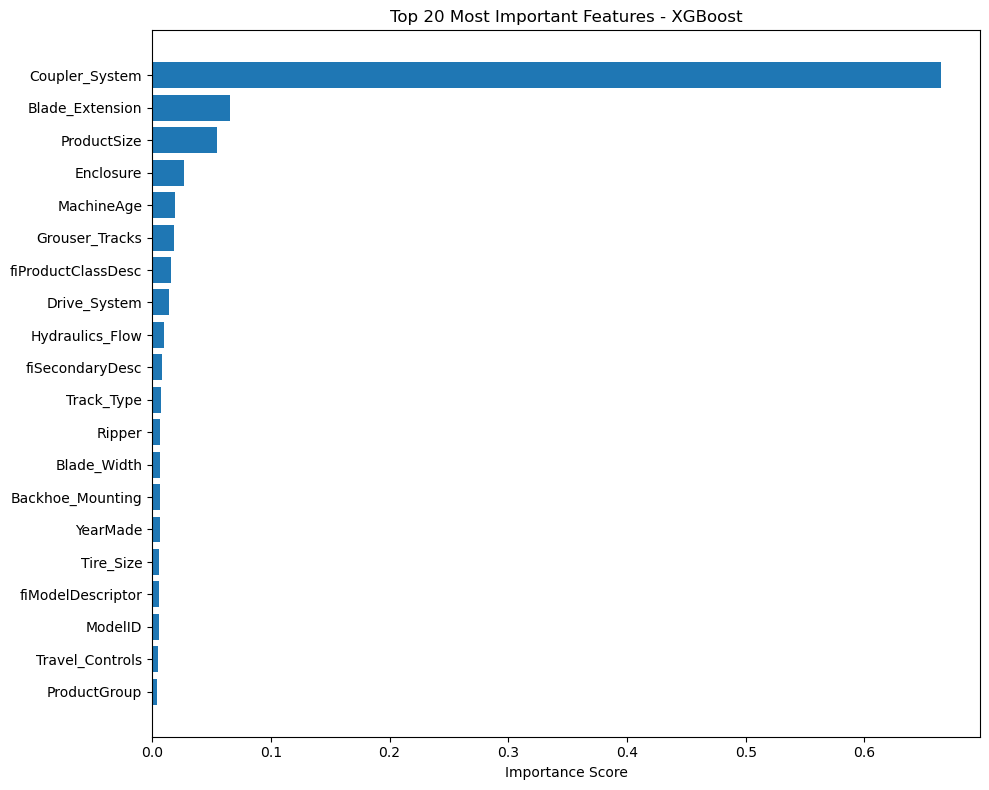

In [116]:
# See which columns affect the prediction most

# Get feature importances from trained model
feature_importance = xgb_model.feature_importances_
features = X_train.columns

# Combine into a DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'][:20][::-1], importance_df['Importance'][:20][::-1])
plt.xlabel('Importance Score')
plt.title('Top 20 Most Important Features - XGBoost')
plt.tight_layout()
plt.show()


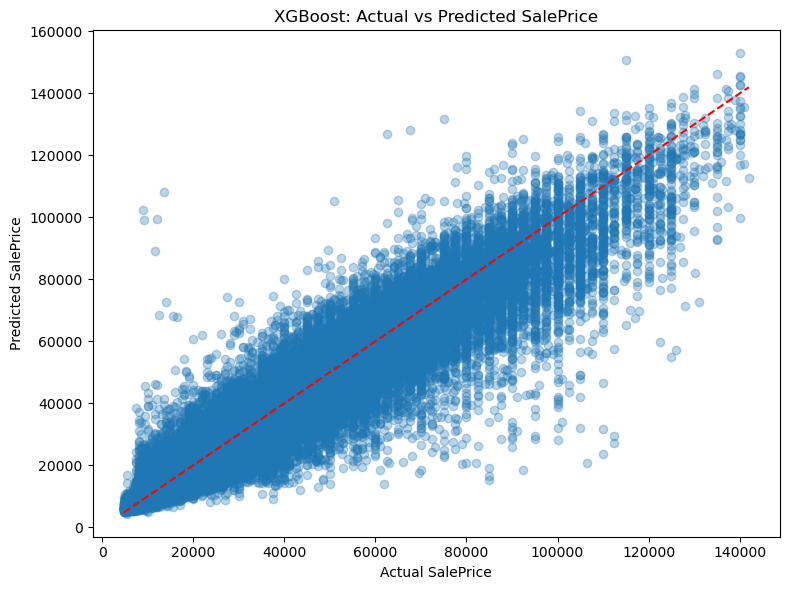

In [118]:
# to visually check how well the model is performing.

# Plot actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_valid, y_pred, alpha=0.3)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('XGBoost: Actual vs Predicted SalePrice')
plt.tight_layout()
plt.show()


#### Let's improve RandomForestReggressor now


In [125]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

# Step 1: Log-transform the target
y_train_log = np.log1p(y_train)
y_valid_log = np.log1p(y_valid)

# Step 2: Improved Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=500,        # More stable
    max_features="sqrt",     # Keeps trees diverse
    min_samples_leaf=1,      # Default → allows deeper splits
    n_jobs=-1,
    random_state=42
)

rf_model.fit(X_train, y_train_log)

# Step 3: Predict and reverse transform
y_pred_log_rf = rf_model.predict(X_valid)
y_pred_rf = np.expm1(y_pred_log_rf)

# Step 4: Evaluate
rmsle_rf = np.sqrt(mean_squared_log_error(y_valid, y_pred_rf))
mae_rf = mean_absolute_error(y_valid, y_pred_rf)
r2_rf = r2_score(y_valid, y_pred_rf)

print("Improved Random Forest with tuned params:")
print("Validation RMSLE:", rmsle_rf)
print("Validation MAE:", mae_rf)
print("Validation R²:", r2_rf)


Improved Random Forest with tuned params:
Validation RMSLE: 0.2084800420607153
Validation MAE: 4499.583452569484
Validation R²: 0.8980356924283557


In [126]:
from catboost import CatBoostRegressor

# Step 1: Log-transform the target (already done above)

# Step 2: Train CatBoost (no need for GPU or silent=True)
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    verbose=False,
    random_seed=42
)

cat_model.fit(X_train, y_train_log)

# Step 3: Predict and reverse transform
y_pred_log_cat = cat_model.predict(X_valid)
y_pred_cat = np.expm1(y_pred_log_cat)

# Step 4: Evaluate
rmsle_cat = np.sqrt(mean_squared_log_error(y_valid, y_pred_cat))
mae_cat = mean_absolute_error(y_valid, y_pred_cat)
r2_cat = r2_score(y_valid, y_pred_cat)

print("Improved CatBoost:")
print("Validation RMSLE:", rmsle_cat)
print("Validation MAE:", mae_cat)
print("Validation R²:", r2_cat)


Improved CatBoost:
Validation RMSLE: 0.22051560714087012
Validation MAE: 4746.613845342285
Validation R²: 0.8921515032798354


##### Among the three models, XGBoost achieved the best performance (R² ≈ 0.907), followed by Random Forest and CatBoost. This suggests that gradient boosting with XGBoost captures the dataset patterns most effectively. Random Forest and CatBoost also performed well, but further tuning gave only marginal improvements.


| Model             | Stage    | RMSLE  | MAE    | R²     |
| ----------------- | -------- | ------ | ------ | ------ |
| **Random Forest** | Initial  | 0.2472 | 5961.4 | 0.8811 |
|                   | Improved | 0.2085 | 4499.6 | 0.8980 |
| **XGBoost**       | Initial  | 0.2874 | 6374.6 | 0.8697 |
|                   | Improved | 0.2073 | 4411.3 | 0.9070 |
| **CatBoost**      | Initial  | 0.2599 | 6127.9 | 0.8784 |
|                   | Improved | 0.2205 | 4746.6 | 0.8921 |



#### Let’s prepare side-by-side comparison plots for your three models — both Initial vs Improved.

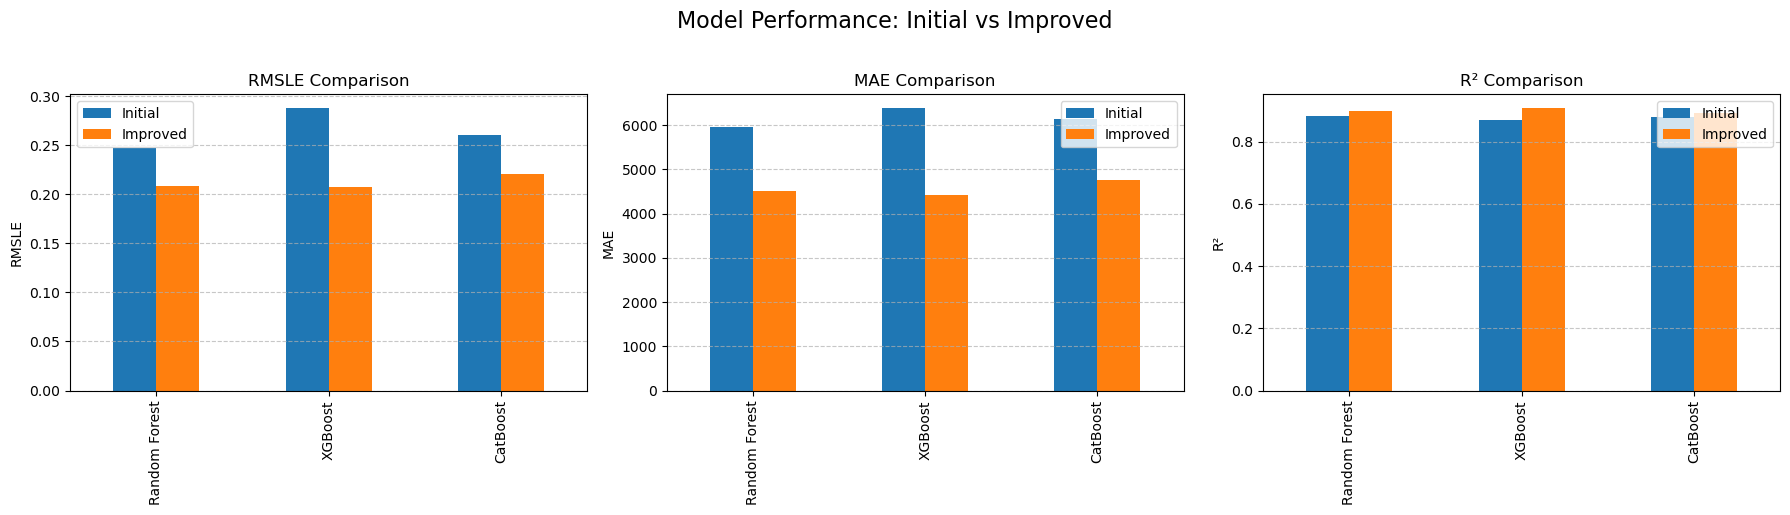

In [128]:
# Initial Scores
initial_scores = {
    "Random Forest": {"RMSLE": 0.2472, "MAE": 5961.4, "R²": 0.8811},
    "XGBoost": {"RMSLE": 0.2874, "MAE": 6374.6, "R²": 0.8697},
    "CatBoost": {"RMSLE": 0.2599, "MAE": 6127.9, "R²": 0.8784},
}

# Improved Scores
improved_scores = {
    "Random Forest": {"RMSLE": 0.2085, "MAE": 4499.6, "R²": 0.8980},
    "XGBoost": {"RMSLE": 0.2073, "MAE": 4411.3, "R²": 0.9070},
    "CatBoost": {"RMSLE": 0.2205, "MAE": 4746.6, "R²": 0.8922},
}

# Convert to DataFrames
df_initial = pd.DataFrame(initial_scores).T
df_improved = pd.DataFrame(improved_scores).T

# Plot comparison for each metric
metrics = ["RMSLE", "MAE", "R²"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    df_compare = pd.DataFrame({
        "Initial": df_initial[metric],
        "Improved": df_improved[metric]
    })
    df_compare.plot(kind="bar", ax=axes[i])
    axes[i].set_title(f"{metric} Comparison")
    axes[i].set_ylabel(metric)
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

plt.suptitle("Model Performance: Initial vs Improved", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


* RMSLE (Root Mean Squared Log Error):
Used here because target values (sale price) span wide ranges. RMSLE penalizes relative errors — great for price prediction problems.
→ Lower is better.

* MAE (Mean Absolute Error):
Tells you the average dollar error. Easy to interpret (e.g., “on average we miss by ~4,400 dollars”).
→ Lower is better.

* R² (Coefficient of Determination):
Tells you how much variance in sale price your model explains. A higher R² = more of the bulldozer price behavior is captured.
→ Higher is better.

###### Together, these 3 metrics give a complete view:

* RMSLE = fairness across big/small prices
* MAE = practical error in dollar terms
* R² = explanatory power

 ### Final Model Comparison (Improved only) - Highlight the best model (XGBoost)

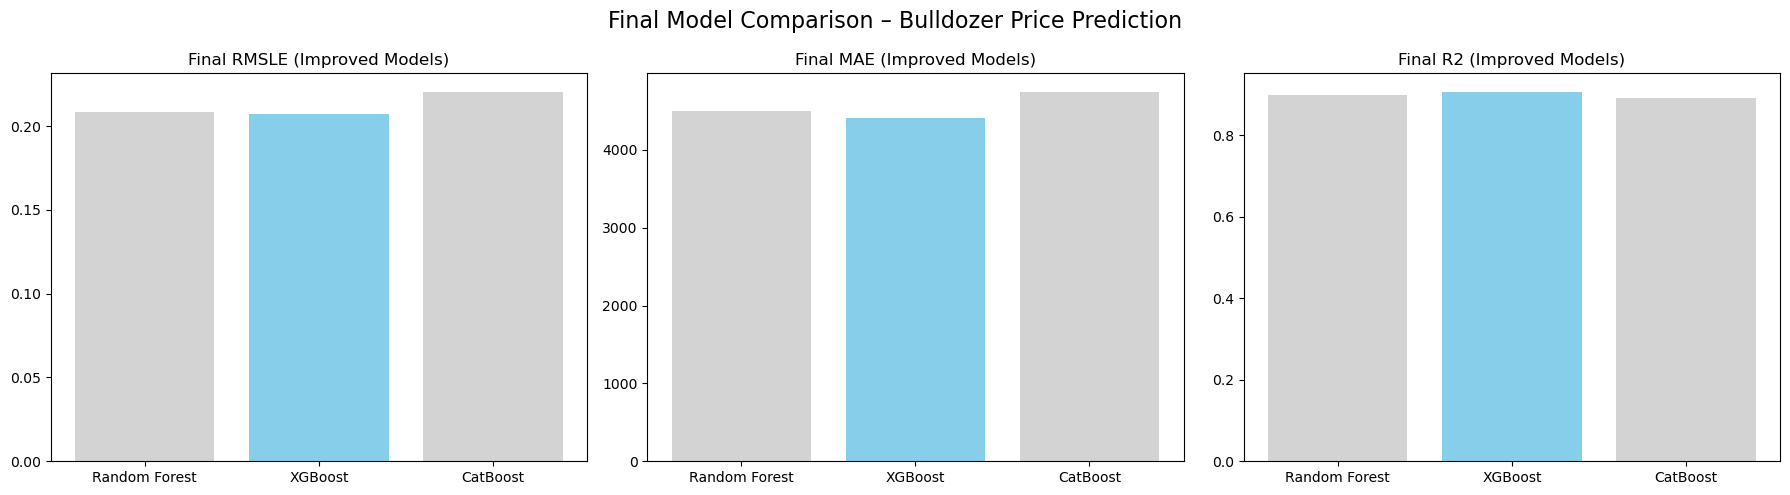

In [133]:
# Improved scores
improved_scores = {
    "Random Forest": {"RMSLE": 0.2085, "MAE": 4499.58, "R2": 0.8980},
    "XGBoost": {"RMSLE": 0.2073, "MAE": 4411.32, "R2": 0.9070},
    "CatBoost": {"RMSLE": 0.2205, "MAE": 4746.61, "R2": 0.8922},
}

improved_df = pd.DataFrame(improved_scores).T
metrics = ["RMSLE", "MAE", "R2"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    colors = ["lightgray", "skyblue", "lightgray"]  # highlight XGBoost
    axes[i].bar(improved_df.index, improved_df[metric], color=colors)
    axes[i].set_title(f"Final {metric} (Improved Models)")

plt.suptitle("Final Model Comparison – Bulldozer Price Prediction", fontsize=16)
plt.tight_layout()
plt.show()


### Actual vs Predicted Plot (only for final model = XGBoost)
* Shows how well predictions align with reality
* This is crucial because bar charts show scores, but this shows behavior

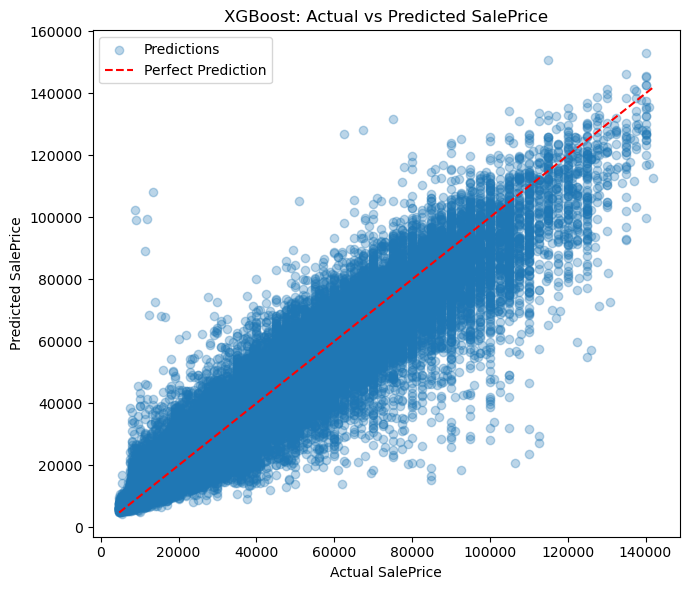

In [136]:
plt.figure(figsize=(7, 6))
plt.scatter(y_valid, y_pred, alpha=0.3, label="Predictions")
plt.plot([y_valid.min(), y_valid.max()],
         [y_valid.min(), y_valid.max()], 'r--', label="Perfect Prediction")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("XGBoost: Actual vs Predicted SalePrice")
plt.legend()
plt.tight_layout()
plt.show()

In [137]:
summary = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "CatBoost"],
    "RMSLE": [0.2085, 0.2073, 0.2205],
    "MAE": [4499.58, 4411.32, 4746.61],
    "R²": [0.8980, 0.9070, 0.8922]
})

summary

,Model,RMSLE,MAE,R²
0,Random Forest,0.2085,4499.58,0.8980
1,XGBoost,0.2073,4411.32,0.9070
2,CatBoost,0.2205,4746.61,0.8922


### Error Analysis - Where did it predict much higher/lower than actual?

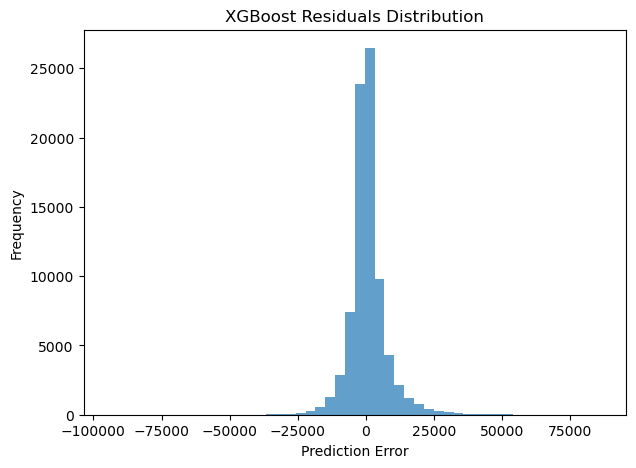

In [138]:
residuals = y_valid - y_pred
plt.figure(figsize=(7,5))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title("XGBoost Residuals Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

In [127]:
# Scores on rs_model (only trained on 10,000 examples)
show_scores(rs_model)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- MachineAge
- saleDayOfWeek
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


In [ ]:
import zipfile

# Path to the ZIP file
zip_path = "C:/Users/a2z/Downloads/bluebook-for-bulldozers (1).zip"

# Save location for Test.csv
test_csv_path = "C:/Users/a2z/Desktop/Test.csv"

# Extract and save Test.csv
with zipfile.ZipFile(zip_path) as z:
    with z.open("bluebook-for-bulldozers/Test.csv") as f:
        with open(test_csv_path, "wb") as out_file:
            out_file.write(f.read())

print("Test.csv has been saved to Desktop!")


In [ ]:
test_data = pd.read_csv("C:/Users/a2z/Desktop/Test.csv", low_memory=False, parse_dates=["saledate"])
test_data.head()


In [ ]:
test_data.isna().sum()

In [ ]:
test_data.info()

In [ ]:
test_data.columns

In [ ]:
X_train.columns

### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [ ]:
def preprocess_data(test_data):
    """
    Perform transformation on test data and return the transformed version.
    """

    # Extract datetime features
    test_data["saleYear"] = test_data.saledate.dt.year
    test_data["saleMonth"] = test_data.saledate.dt.month
    test_data["saleDay"] = test_data.saledate.dt.day
    test_data["saleDayofWeek"] = test_data.saledate.dt.dayofweek
    test_data["saleDayofYear"] = test_data.saledate.dt.dayofyear

    # Drop the original saledate column
    test_data.drop("saledate", axis=1, inplace=True)

    # Fill missing values and encode categories
    for label, content in test_data.items():
        # Handle numeric columns
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                test_data[label + "_is_missing"] = pd.isnull(content)
                test_data[label] = content.fillna(content.median())

        # Handle categorical columns
        if not pd.api.types.is_numeric_dtype(content):
            test_data[label + "_is_missing"] = pd.isnull(content)
            test_data[label] = pd.Categorical(content).codes + 1

    return test_data


In [ ]:
# Process the test data
test_data = preprocess_data(test_data)
test_data.head()

In [ ]:
# Make predictions on updated test data
test_preds = ideal_model.predict(test_data)

In [ ]:
X_train.head()

In [ ]:
##### So there is difference in the no.of columns that our test data frame and our training data frame and that's why our model doesn't work

In [ ]:
# We can find how the columns differ using sets ( find which one is missing)
set(X_train.columns) - set(test_data.columns)

In [ ]:
# Manually adjust test_data to have auctioneerID_is_missing column
test_data["auctioneerID_is_missing"] = False  # because it had no missing value
test_data.head()

##### Finally now our test dataframe has the same features as our training dataframe, we can make predictions now!

In [ ]:
# Reorder columns to match training set
test_data = test_data[X_train.columns]

# Make predictions on the test data
test_preds = ideal_model.predict(test_data)

In [ ]:
test_preds

We've made some predictions but they're not in the same format kaggle is asking for
https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

In [ ]:
# Format predictions into the same format kaggle is after 
test_preds = pd.DataFrame()
test_preds["SalesID"] = test_data["SalesID"]
test_preds["SalesPrice"] = test_preds
test_preds

In [ ]:
# Export prediction data
test_preds.to_csv("C:/Users/a2z/Desktop/test_predictions.csv", index=False)

## Feature Importance
Feaature importance seeks to figure out which different attributes of the data were most important or most contributive to predicting the target variable(SalePrice).

In [ ]:
# Find feature importance of our best model
ideal_model.feature_importances_

In [ ]:
len(ideal_model.feature_importances_)

In [ ]:
X_train.shape

In [ ]:
X_train

In [ ]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")

In [ ]:
plot_features(X_train.columns, ideal_model.feature_importances_)



**Quetion to finish:** Why might knowing the feature importances of a trained machine learing model be helpful?

Knowing feature importances helps you:

* Understand the model – see which features drive predictions.
* Select features – remove irrelevant ones to simplify the model.
* Debug – detect biases or spurious correlations.
* Guide data collection – focus on high-impact features.
* Build trust – explain decisions to stakeholders.
* Improve features – create new ones from important inputs.